Load .out file and show the Tb vs frequency plot

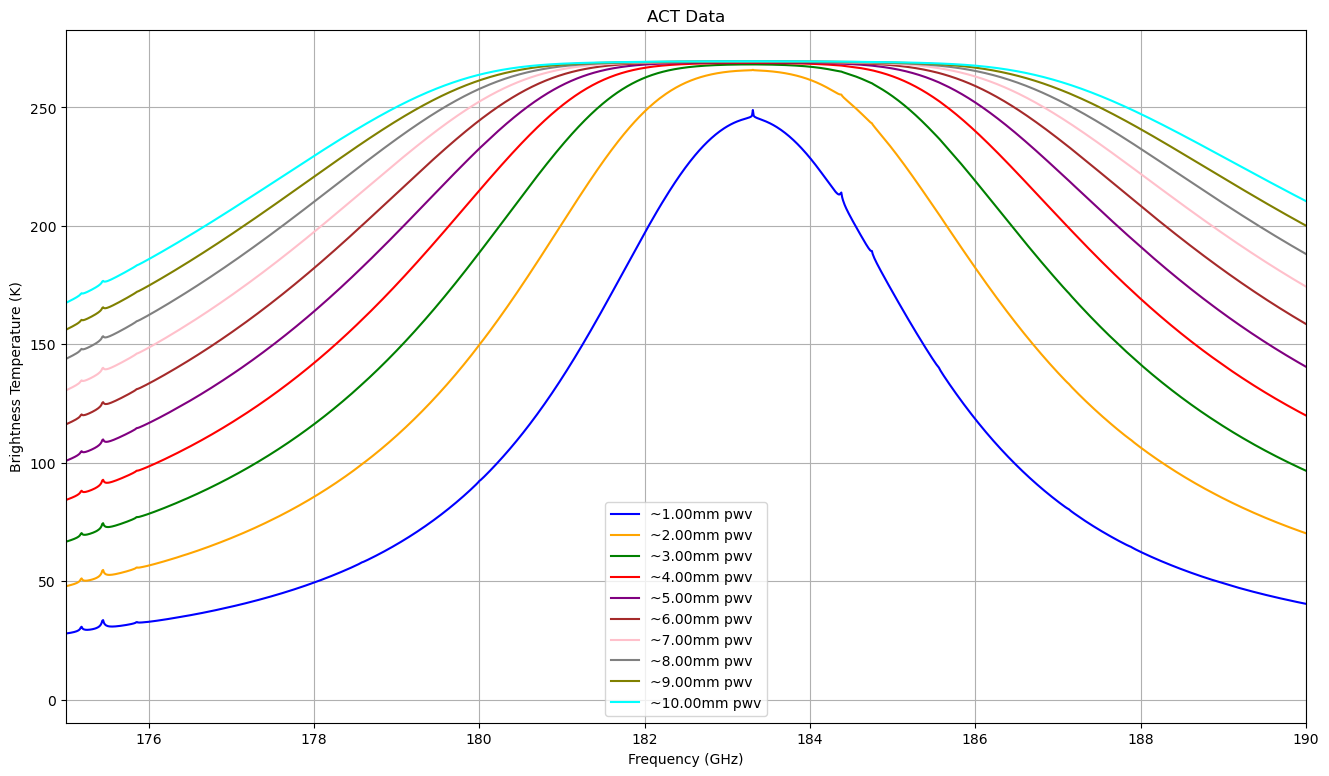

In [7]:
from typing import Dict
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u

name = "1_10pwv"
#load the data  
output_file = f"{name}_inp.txt"
output_data = np.loadtxt(output_file)
#print(output_data)
#seperate the rows by PWV
out_dict: Dict[str, Dict[str,list]] = {}
for row in output_data:

    if row[1] == 0:
        key = f"{row[0]:.2f}mm pwv"
        out_dict[key] = {}

    elif row[1] != 0:
        #add the frequency and brightness temperature to the dictionary
        #key = f"{row[0]:.2f}mm pwv"
        if "frequencies" not in out_dict[key]:
            out_dict[key]["frequencies"] = []
            out_dict[key]["brightness_temperature"] = []
        out_dict[key]["frequencies"].append(row[0])
        out_dict[key]["brightness_temperature"].append(row[1])

        
#print(out_dict)

# fre = output_data[:, 0] * u.GHz
# Tb = output_data[:, 1] * u.K

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# fig0,ax0 = plt.subplots(figsize=(16, 9))
fig1,ax1 = plt.subplots(figsize=(16, 9))

for key in out_dict:
    fre = np.array(out_dict[key]["frequencies"]) * u.GHz
    Tb = np.array(out_dict[key]["brightness_temperature"]) * u.K

    #plot the data

    ax1.plot(fre.value, Tb.value, label=f"~{key}", color=colors.pop(0))
    ax1.set_xlabel('Frequency (GHz)')
    ax1.set_ylabel('Brightness Temperature (K)')
    ax1.set_title('ACT Data')
    ax1.grid(True)
    ax1.legend()

#save the figures into folder results
os.makedirs("results", exist_ok=True)
fig1.savefig(os.path.join("results", f"{name}_ACT_data.png"), dpi=300)
fig1.savefig(os.path.join("results", f"{name}_ACT_data.pdf"))
ax1.set_xlim(175, 190)
fig1.savefig(os.path.join("results", f"{name}_ACT_data_zoomed.png"), dpi=300)
fig1.savefig(os.path.join("results", f"{name}_ACT_data_zoomed.pdf"))

plt.show()


png file name:  diff_Tbase with diff pwv_ACT_data.png
png file name:  diff_Tbase with diff pwv_ACT_data_zoomed.png
png file name:  diff_Tbase with diff pwv_ACT_data_zoomed2.png
png file name:  diff_Tbase with diff pwv_ACT_data_zoomed3.png


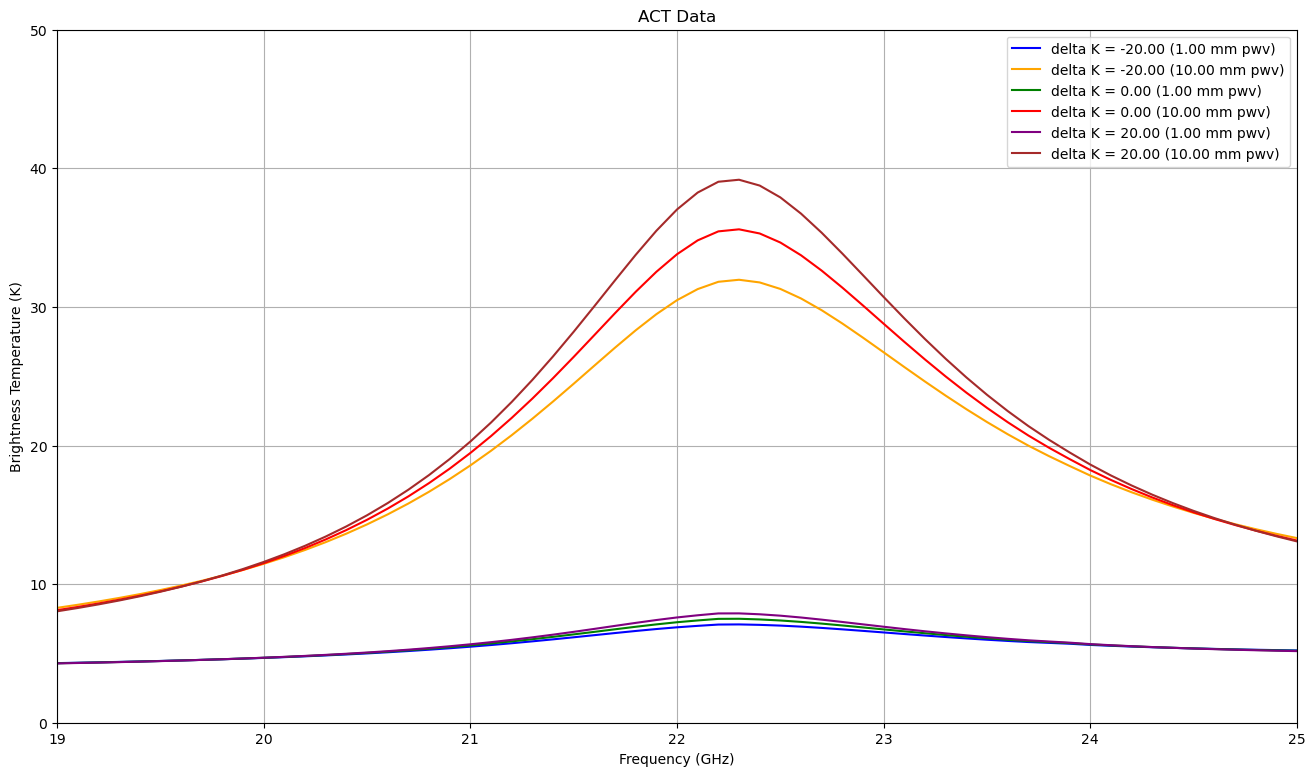

In [7]:
from typing import Dict
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import os

def save_figure(name):
        
    #save the figures into folder results
    os.makedirs("results", exist_ok=True)
    fig1.savefig(os.path.join("results", f"{name}_ACT_data.png"), dpi=300)
    fig1.savefig(os.path.join("results", f"{name}_ACT_data.pdf"))
    print("png file name: ", f"{name}_ACT_data.png")
    ax1.set_xlim(175, 190)
    fig1.savefig(os.path.join("results", f"{name}_ACT_data_zoomed.png"), dpi=300)
    fig1.savefig(os.path.join("results", f"{name}_ACT_data_zoomed.pdf"))
    print("png file name: ", f"{name}_ACT_data_zoomed.png")
    ax1.set_xlim(50, 70)
    fig1.savefig(os.path.join("results", f"{name}_ACT_data_zoomed2.png"), dpi=300)
    fig1.savefig(os.path.join("results", f"{name}_ACT_data_zoomed2.pdf"))
    print("png file name: ", f"{name}_ACT_data_zoomed2.png")
    ax1.set_xlim(19, 25)
    ax1.set_ylim(0, 50)
    fig1.savefig(os.path.join("results", f"{name}_ACT_data_zoomed3.png"), dpi=300)
    fig1.savefig(os.path.join("results", f"{name}_ACT_data_zoomed3.pdf"))
    print("png file name: ", f"{name}_ACT_data_zoomed3.png")

    

name = "diff_Tbase"
#load the data  
output_file = f"{name}_inp.txt"
output_data = np.loadtxt(output_file)
#print(output_data)
#seperate the rows by PWV
out_dict: Dict[str, Dict[str,list]] = {}

for row in output_data:

    if row[-1] == 0:
        key = f"delta K = {row[0]:.2f} ({row[1]:.2f} mm pwv)"
        out_dict[key] = {}

    elif row[-1] != 0:
        #add the frequency and brightness temperature to the dictionary
        #key = f"{row[0]:.2f}mm pwv"
        if "frequencies" not in out_dict[key]:
            out_dict[key]["frequencies"] = []
            out_dict[key]["transmittance"] = []
            out_dict[key]["brightness_temperature"] = []
        out_dict[key]["frequencies"].append(row[0])
        out_dict[key]["transmittance"].append(row[1])
        out_dict[key]["brightness_temperature"].append(row[2])

        
#print(out_dict)

# fre = output_data[:, 0] * u.GHz
# Tb = output_data[:, 1] * u.K

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# fig0,ax0 = plt.subplots(figsize=(16, 9))
fig1,ax1 = plt.subplots(figsize=(16, 9))

for key in out_dict:
    fre = np.array(out_dict[key]["frequencies"]) * u.GHz
    Tb = np.array(out_dict[key]["brightness_temperature"]) * u.K

    #plot the data

    ax1.plot(fre.value, Tb.value, label=f"{key}", color=colors.pop(0))
    ax1.set_xlabel('Frequency (GHz)')
    ax1.set_ylabel('Brightness Temperature (K)')
    ax1.set_title('ACT Data')
    ax1.grid(True)
    ax1.legend()

save_figure(name+" with diff pwv")
plt.show()
